In [125]:
%matplotlib inline
import matplotlib.pyplot as plt
import sys
sys.path.append('../../process/')
import psml
import imp
import numpy as np
from os import listdir

In [ ]:
This is in a really messy unfinished state

In [110]:
#List of paths to traces, there are 4.
trace_dir = 'traces/'
l = [trace_dir+i for i in listdir(trace_dir)]
len(l)

4

In [112]:
#Generate the excited BYTE mask across traces. 15 excited bytes.
exc_mask = psml.paths_to_excited_mask(l)
exc_mask.shape, exc_mask.sum()

((65544,), 15)

In [35]:
#Load 4 traces, applying excited mask.
#3d array, result: (num traces, num states, num bytes)
exc_trcs = psml.paths_to_svmasked(l, exc_mask)
exc_trcs.shape

(4, 1894, 15)

(4, 1894, 2)

(4, 1894)

IndexError: tuple index out of range

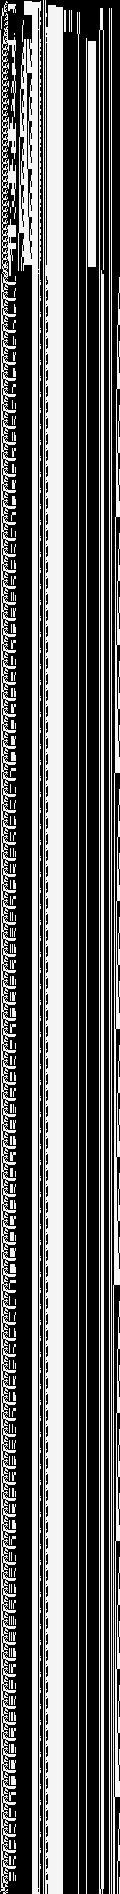

In [98]:
#psml.show_arr(psml.byte_to_bit_sv(exc_trcs))
expanded = psml.byte_to_bit_sv(exc_trcs)
psml.show_arr(expanded[0])

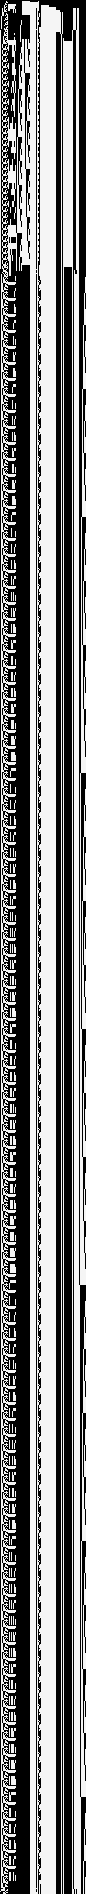

In [103]:
#There are non excited bits in that trace. Removing them.
excited_bits = psml.mask_svarr(expanded, psml.svarr_to_excited_mask(expanded))
psml.show_arr(excited_bits[0])

In [104]:
datadep = psml.mask_svarr(excited_bits, psml.svarr_to_datadep_mask(excited_bits))

In [109]:
psml.svarr_to_datadep_mask(excited_bits)

(4, 1894, 14)

In [114]:
#This is the full trace, let's see the unique pc values. 
#We're looking at a 6502 trace, so the pc is 2 bytes wide. 
#It was arbitrarily placed at the first 2 bytes of the state vec.
#The second byte is not always zero, the printout may be misleading.
pc = exc_trcs[:,:,0:2]
pc.shape

(4, 1894, 2)

In [115]:
#Compress two bytes of pc into one int.
pc = pc[:,:,0] + pc[:,:,1] * 256
pc.shape

(4, 1894)

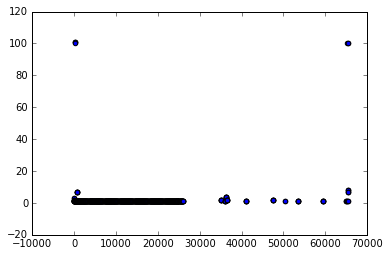

In [126]:
upcs, counts = np.unique(pc[0], return_counts=True)
plt.scatter(upcs, counts)
plt.show()

In [130]:
cond = counts > 90
list(zip(upcs[cond], counts[cond]))

[(93, 101),
 (102, 101),
 (103, 101),
 (105, 100),
 (65124, 100),
 (65375, 100),
 (65379, 100)]

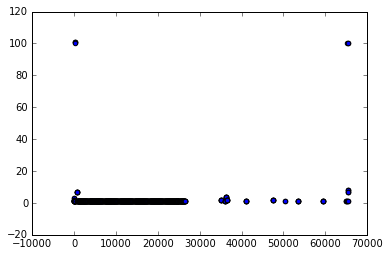

In [137]:
upcs, counts = np.unique(pc[2], return_counts=True)
plt.scatter(upcs, counts)
plt.show()

In [138]:
list(zip(upcs[cond], counts[cond]))

[(93, 101),
 (102, 101),
 (103, 101),
 (105, 100),
 (65124, 100),
 (65375, 100),
 (65379, 100)]

In [144]:
for i in pc:
    print(np.array_equal((pc[0] == 93) , (i == 93)))

True
True
True
True


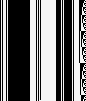

In [157]:
psml.show_arr(excited_bits[:, pc[0]==93, :][0])

In [151]:
pc[0]==93

array([False, False, False, ..., False, False, False], dtype=bool)